# PCA code in python

In [ ]:
# we import all the needed libraries
import pandas as pd    
import numpy as np    
import random as rd    
from sklearn.decomposition import PCA    
from sklearn import preprocessing    
import matplotlib.pyplot as plt   

In [4]:
genes = ['gene'+str(i) for i in range(1,101)]
wt = ['wt' + str(i) for i in range(1,6) ]
ko = ['ko' + str(i) for i in range(1,6) ]
# create a data frame from above data
data = pd.DataFrame(columns=[*wt, *ko], index = genes)
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam = rd.randrange(10,1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam = rd.randrange(10,1000), size=5)
print(f'created data of shape {data.shape}')
data.head()

created data of shape (100, 10)


,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,891,874,918,850,900,984,984,999,1060,1028
gene2,481,500,464,485,474,788,778,737,787,733
gene3,436,462,440,463,457,646,636,621,633,595
gene4,952,994,927,1037,982,758,817,854,787,794
gene5,777,749,755,683,706,643,677,641,630,639


<h1> Now we do PCA </h1>

In [12]:
# first we preprocess the data
# we do 2 things
# calculate the mean of the data and center it there
# calculate the standard deviation for each gene and scale it by it to make sure they are on the same scale
scaled_data = preprocessing.scale(data.T)

In [13]:
# we can use the object PCA once trained on another dataset
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [15]:
per_var = np.round(pca.explained_variance_ratio_, decimals = 1)
per_var

array([0.9, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

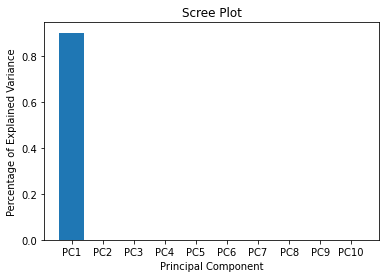

In [16]:
# plot
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]    
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")    
plt.xlabel("Principal Component")    
plt.title("Scree Plot")    
plt.show()

In [17]:
# now create a dataframe from new data 
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)    
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,-9.435053,3.566521,0.456214,-0.382392,-1.561538,-0.164304,-0.087042,-0.624733,0.291424,2.958988e-15
wt2,-9.665941,-1.272562,-0.569757,-2.022348,0.459717,-1.193931,0.556495,-0.401447,-0.755480,1.152450e-15
wt3,-9.197835,-1.337586,-0.352260,1.093276,-1.523213,1.130824,-0.700045,0.445829,-0.811877,4.836496e-16
wt4,-9.706687,-0.716397,0.471982,2.268561,1.088789,0.144064,1.324868,-0.400589,0.440825,2.030582e-15
wt5,-9.467553,-0.207823,-0.064247,-0.902217,1.494568,0.071547,-1.138578,1.007093,0.821760,1.769631e-15


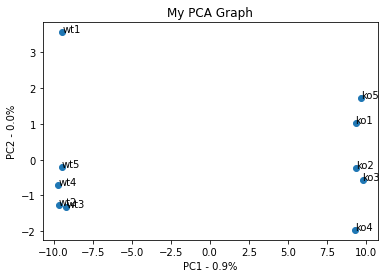

In [19]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("My PCA Graph")    
plt.xlabel(f"PC1 - {per_var[0]}%")    
plt.ylabel(f"PC2 - {per_var[1]}%")    
for sample in pca_df.index:    
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))    
plt.show()  

Now let's look at the loading scores to see which genes had the largest influence

In [20]:
loading_scores = pd.Series(pca.components_[0], index = genes)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_genes = sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_genes])

gene17    0.105232
gene9     0.105226
gene74    0.105221
gene6    -0.105216
gene53    0.105214
gene15   -0.105213
gene8     0.105207
gene34   -0.105203
gene89    0.105172
gene85    0.105159
dtype: float64


In [21]:
# Conclusion a lot of genes paid role in separating the samples